<a href="https://colab.research.google.com/github/josline-13/traffic-sign-recognition-using-template-matching-and-CNN/blob/master/Traffic_Signs_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [2]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 90kB/s 
     |████████████████████████████████| 3.2MB 38.2MB/s 
     |████████████████████████████████| 491kB 49.8MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pickle
import pandas as pd
import cv2

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
np.random.seed(0)

In [0]:
# TODO: Implement load the data here.
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
# TODO: Load test data
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

    
# Split out features and labels
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']


In [6]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


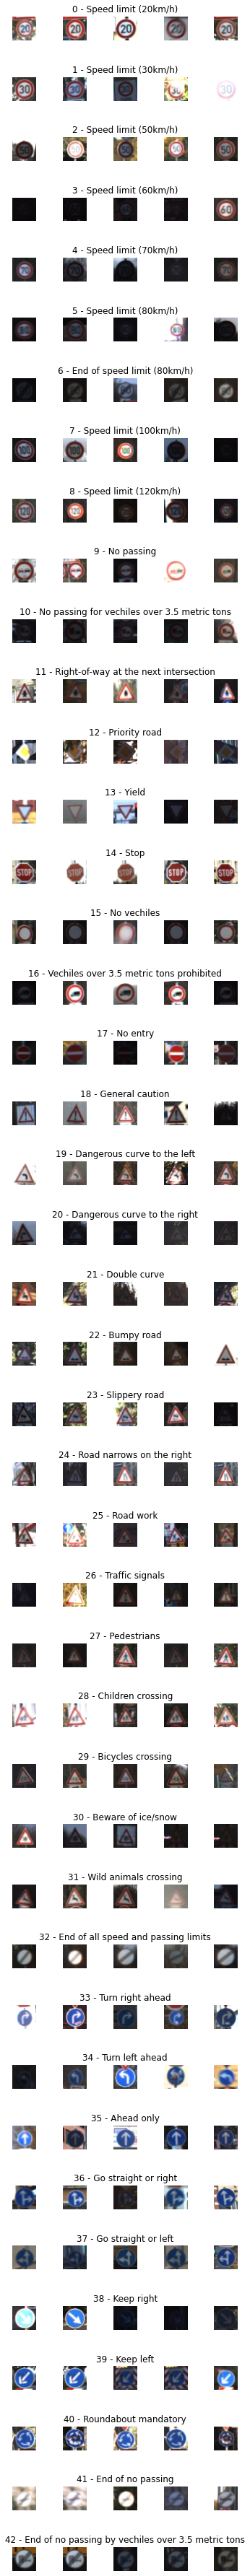

In [7]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
  
num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
      for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


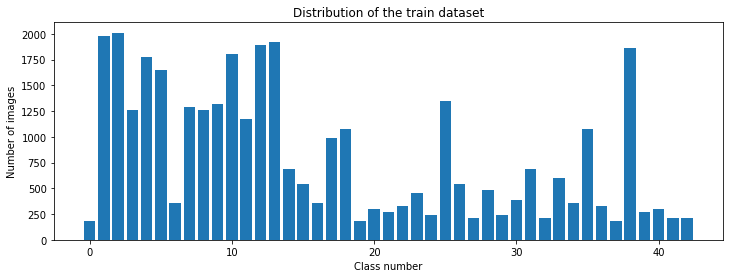

In [8]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


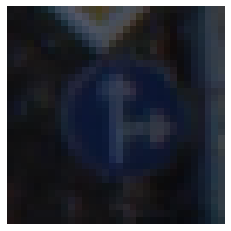

In [9]:
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


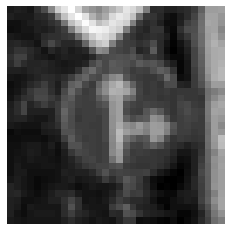

In [10]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
#plt.imshow(img)
plt.imshow(img, cmap="gray")
plt.axis("off")
print(img.shape)

(32, 32)


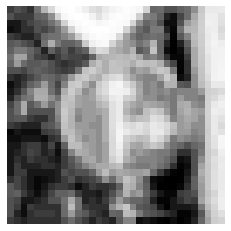

In [11]:
from skimage import exposure
def equalize(img):
    img = cv2.equalizeHist(img) #Histogram equilization
    #img = exposure.equalize_adapthist(img, clip_limit=0.03) 
    return img
img = equalize(img)
#plt.imshow(img)
plt.imshow(img, cmap="gray")
plt.axis("off")
print(img.shape)

In [0]:
def preprocess(img): 
    img = grayscale(img)
    img = equalize(img)
    img = img/255 #Normalization of pixel value betwen 0 and 1
    return img

X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

(34799, 32, 32)


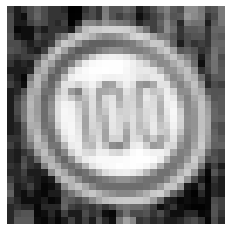

In [13]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)],cmap="gray")
plt.axis('off')
print(X_train.shape)

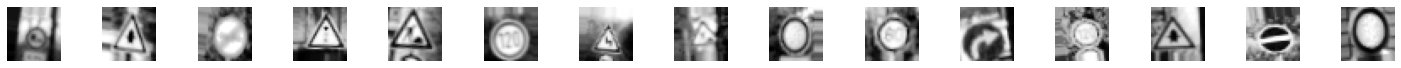

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
from keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

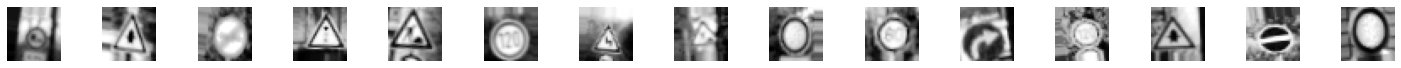

In [18]:
# for X_batch, y_batch in 

batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32),cmap="gray")
    axs[i].axis("off")

In [0]:
# create model

def modified_model():
  model = Sequential()#every model building normal ANN is called sequential//formality
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))#adding the first layer of convolution
  model.add(Conv2D(60, (5, 5), activation='relu'))#another layer of convultion,reducing the pixels
  model.add(MaxPooling2D(pool_size=(2, 2)))#2x2 pixel is used for pooling
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())#to prepare the extracted pixel for ANN
  model.add(Dense(500, activation='relu'))#more the dense more deeply connected neural network
  model.add(Dropout(0.5))#for back propogation
  model.add(Dense(43, activation='softmax'))#the probability value of the final output is compared according to softmax
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# New Section

In [20]:
model = modified_model()
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)             

In [21]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)


Epoch 1/10
2000/2000 [==============================] - 925s 463ms/step - loss: 0.8943 - accuracy: 0.7376 - val_loss: 0.1382 - val_accuracy: 0.9569
Epoch 2/10
2000/2000 [==============================] - 917s 458ms/step - loss: 0.2061 - accuracy: 0.9364 - val_loss: 0.0645 - val_accuracy: 0.9791
Epoch 3/10
2000/2000 [==============================] - 920s 460ms/step - loss: 0.1405 - accuracy: 0.9565 - val_loss: 0.0706 - val_accuracy: 0.9812
Epoch 4/10
2000/2000 [==============================] - 917s 458ms/step - loss: 0.1090 - accuracy: 0.9661 - val_loss: 0.0424 - val_accuracy: 0.9882
Epoch 5/10
2000/2000 [==============================] - 905s 453ms/step - loss: 0.0951 - accuracy: 0.9710 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 6/10
2000/2000 [==============================] - 880s 440ms/step - loss: 0.0836 - accuracy: 0.9744 - val_loss: 0.0238 - val_accuracy: 0.9943
Epoch 7/10
2000/2000 [==============================] - 919s 459ms/step - loss: 0.0719 - accuracy: 0.9783 - val

In [0]:
model.save('traffic_sign_model.h5')
from keras.models import load_model
model = load_model('traffic_sign_model.h5')

Text(0.5, 0, 'epoch')

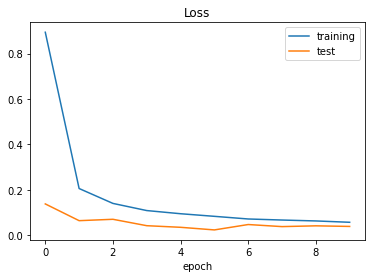

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','test'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

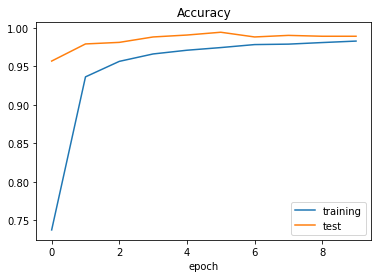

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')


In [25]:
# TODO: Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.12207261632250072
Test accuracy: 0.9730799794197083


"import urllib\nimport cv2\nimport numpy as np\n\nurl='http://192.168.225.181:8080/shot.jpg'\n\nwhile True:\n    imgResp=urllib.request.urlopen(url)\n    imgNp=np.array(bytearray(imgResp.read()),dtype=np.uint8)\n    img=cv2.imdecode(imgNp,-1)\n\n    # all the opencv processing is done here\n    cv2.imshow('test',img)\n    key = cv2.waitKey(1) & 0xFF\n    if key == ord('q'):\n        break\ncv2.waitKey(1)\ncv2.destroyWindow('test')    \n    #if ord('q')==cv2.waitKey(1):\n     #   exit(0)"

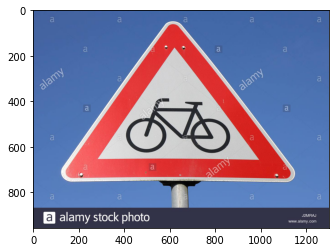

In [26]:
#predict internet number
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
#img = cv2.imread('00024.png')
plt.imshow(img)


'''import urllib
import cv2
import numpy as np

url='http://192.168.225.181:8080/shot.jpg'

while True:
    imgResp=urllib.request.urlopen(url)
    imgNp=np.array(bytearray(imgResp.read()),dtype=np.uint8)
    img=cv2.imdecode(imgNp,-1)

    # all the opencv processing is done here
    cv2.imshow('test',img)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
cv2.waitKey(1)
cv2.destroyWindow('test')    
    #if ord('q')==cv2.waitKey(1):
     #   exit(0)'''

(32, 32)


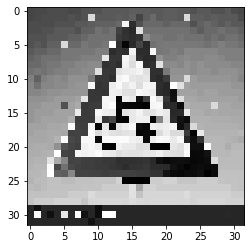

In [27]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)


In [28]:
pred=model.predict_classes(img)[0]
print("predicted sign: "+ str(pred))

predicted sign: 29


In [31]:
sign = classes[pred]
print(sign)

Bicycles crossing


In [0]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }